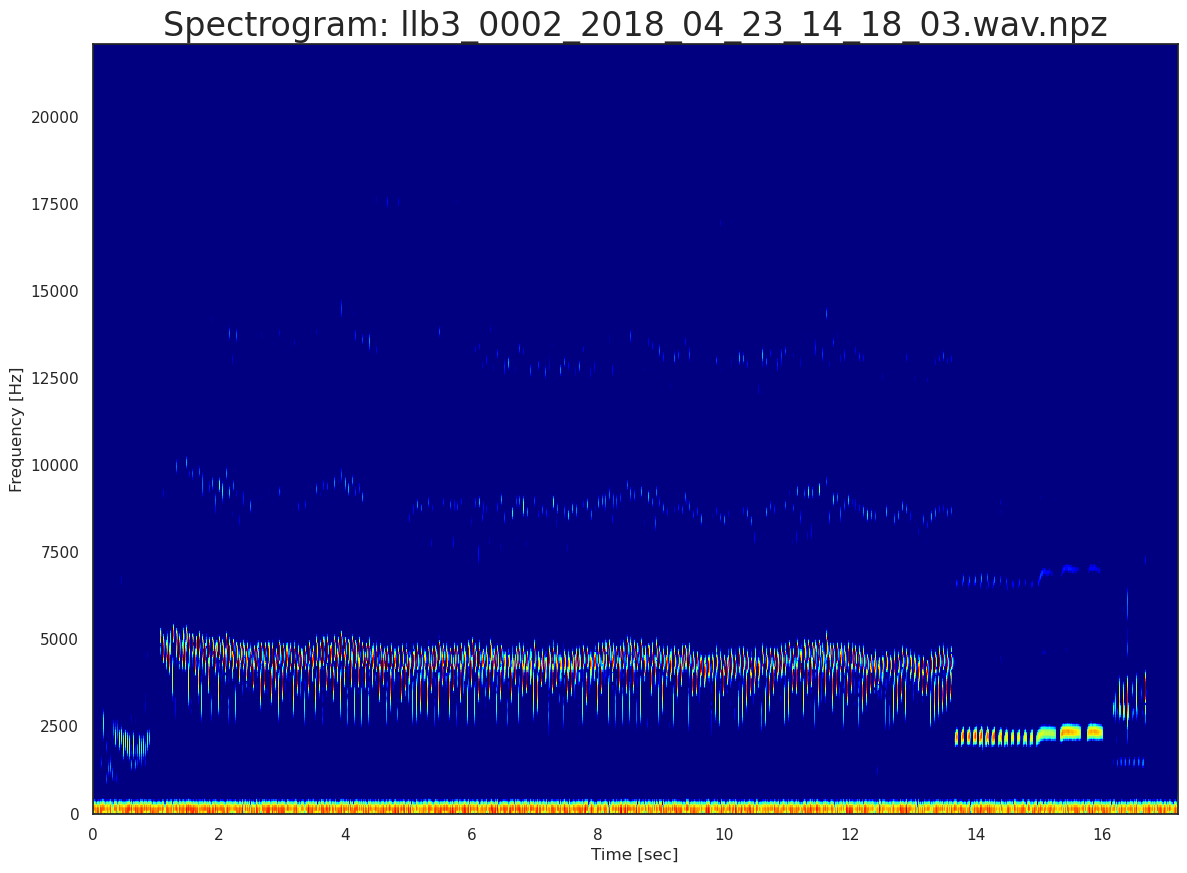

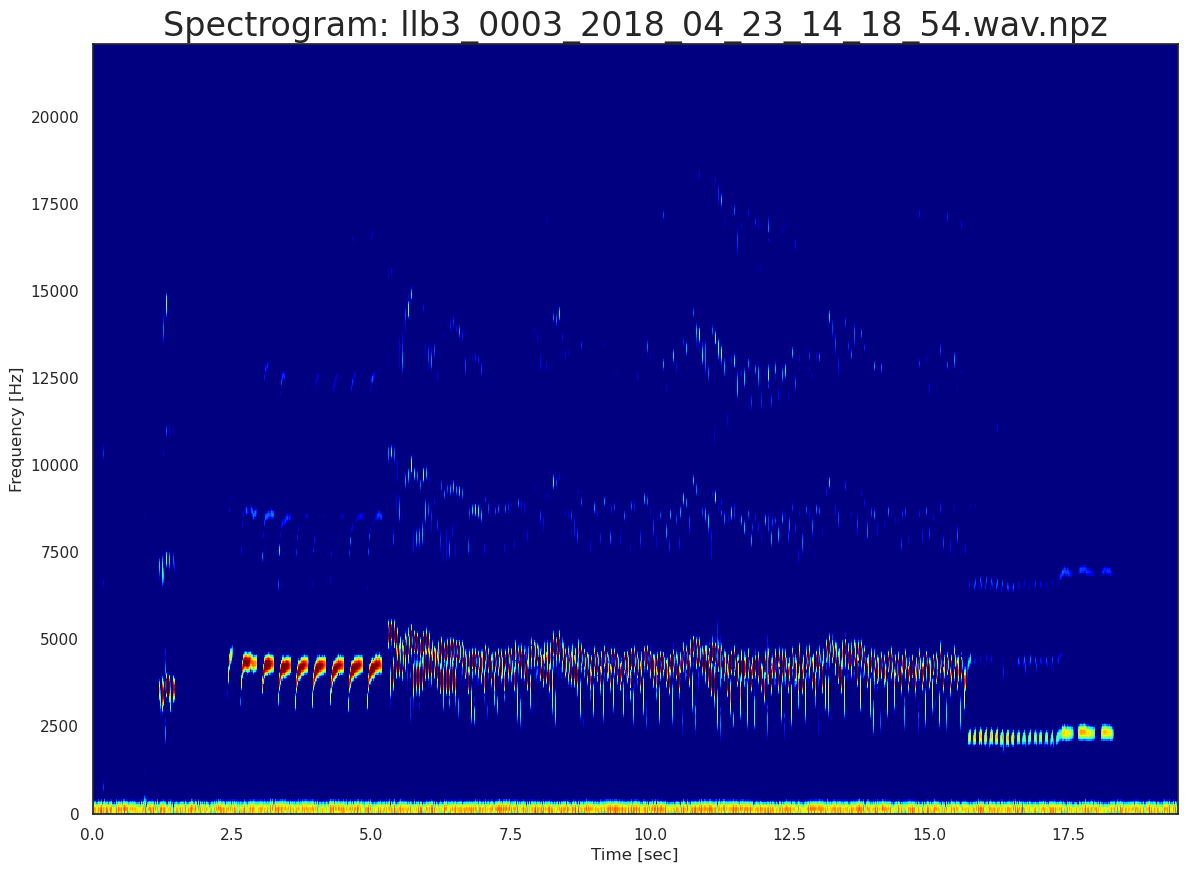

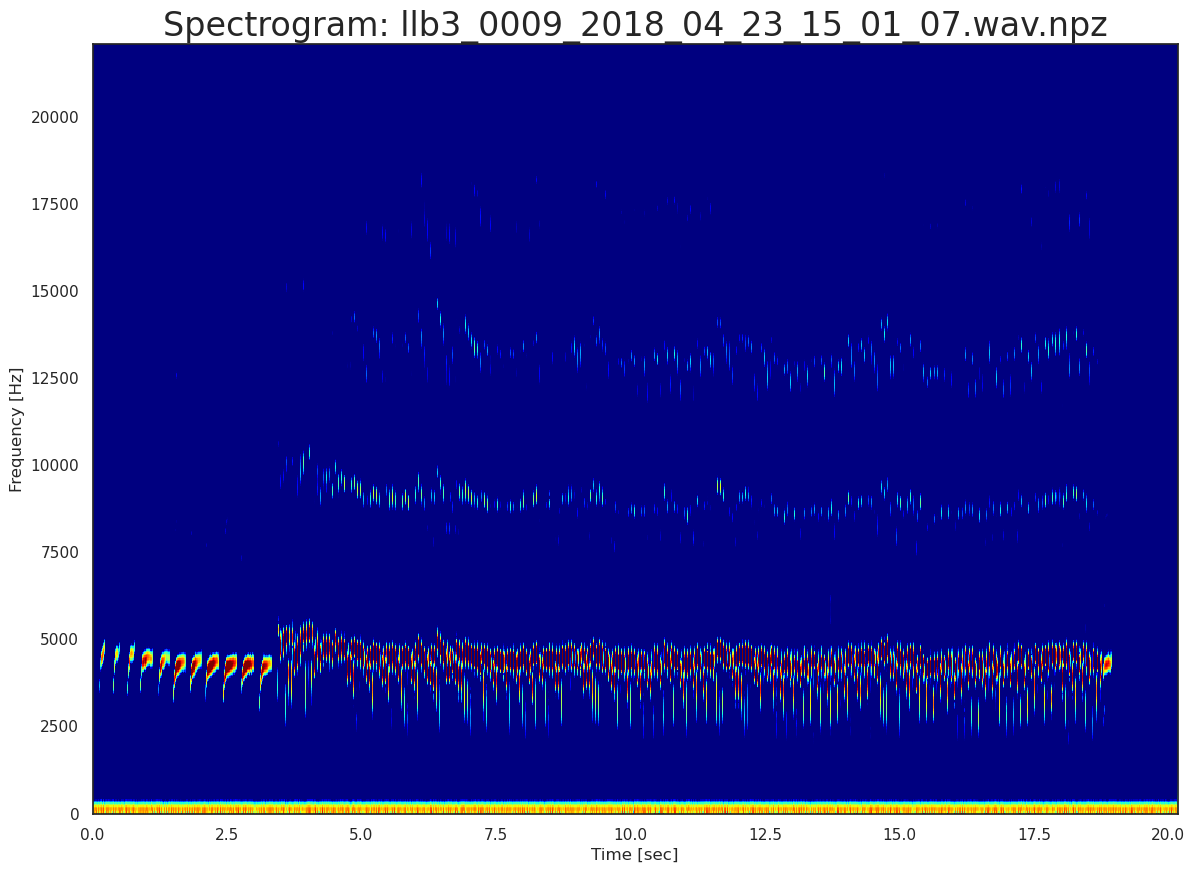

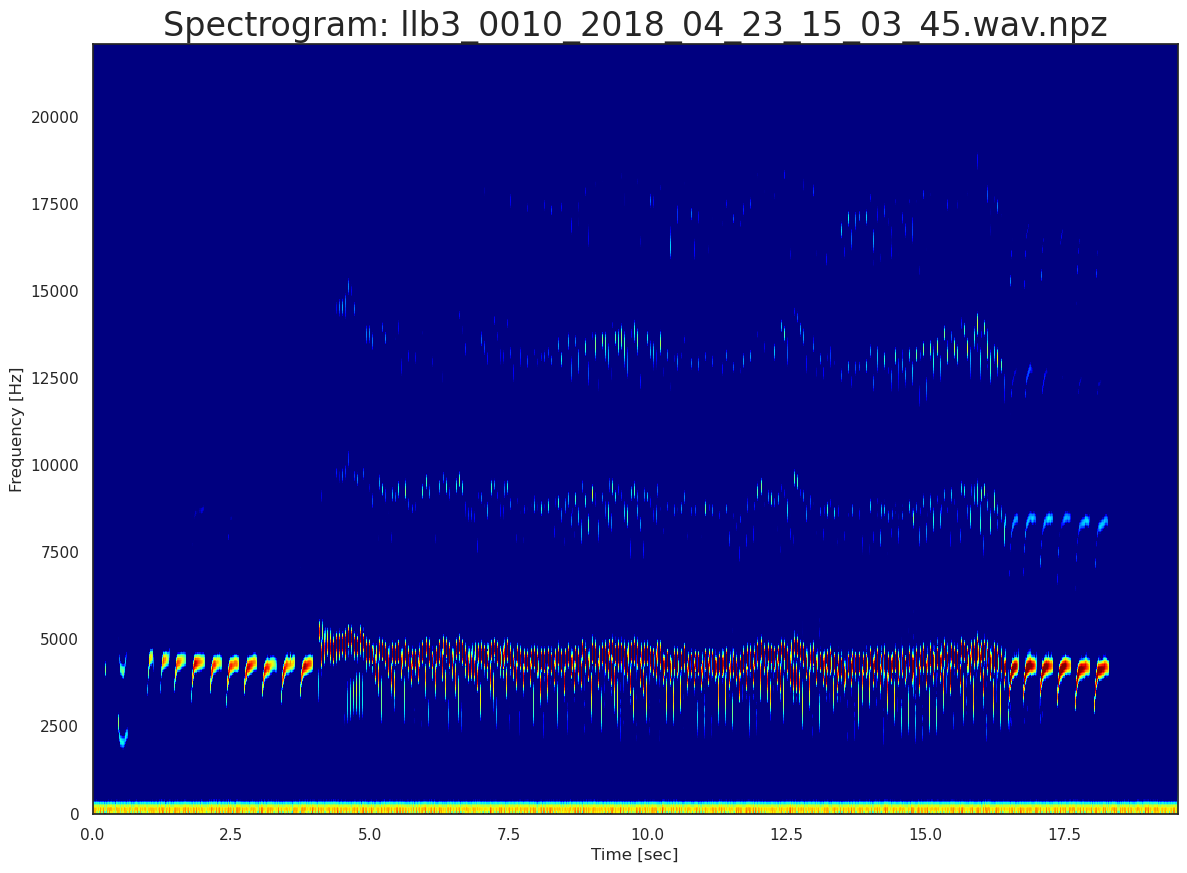

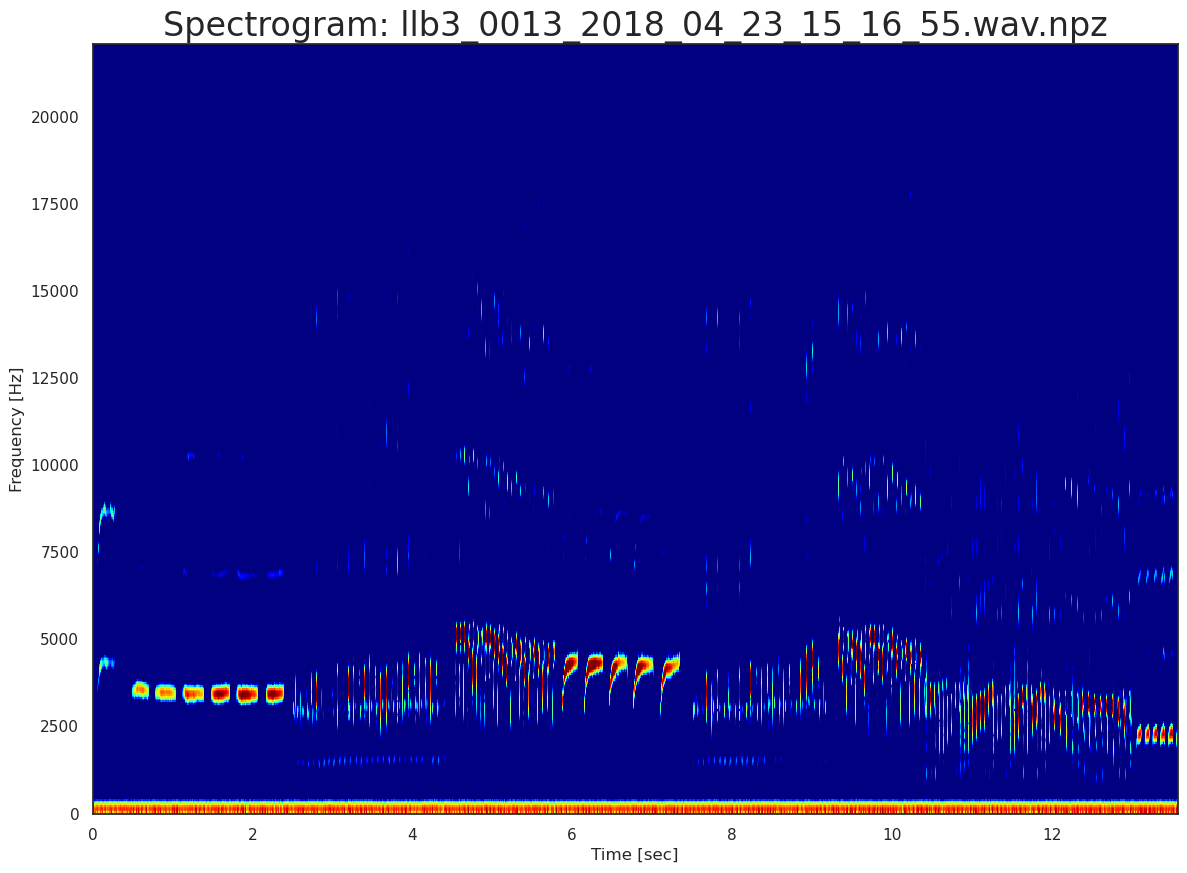

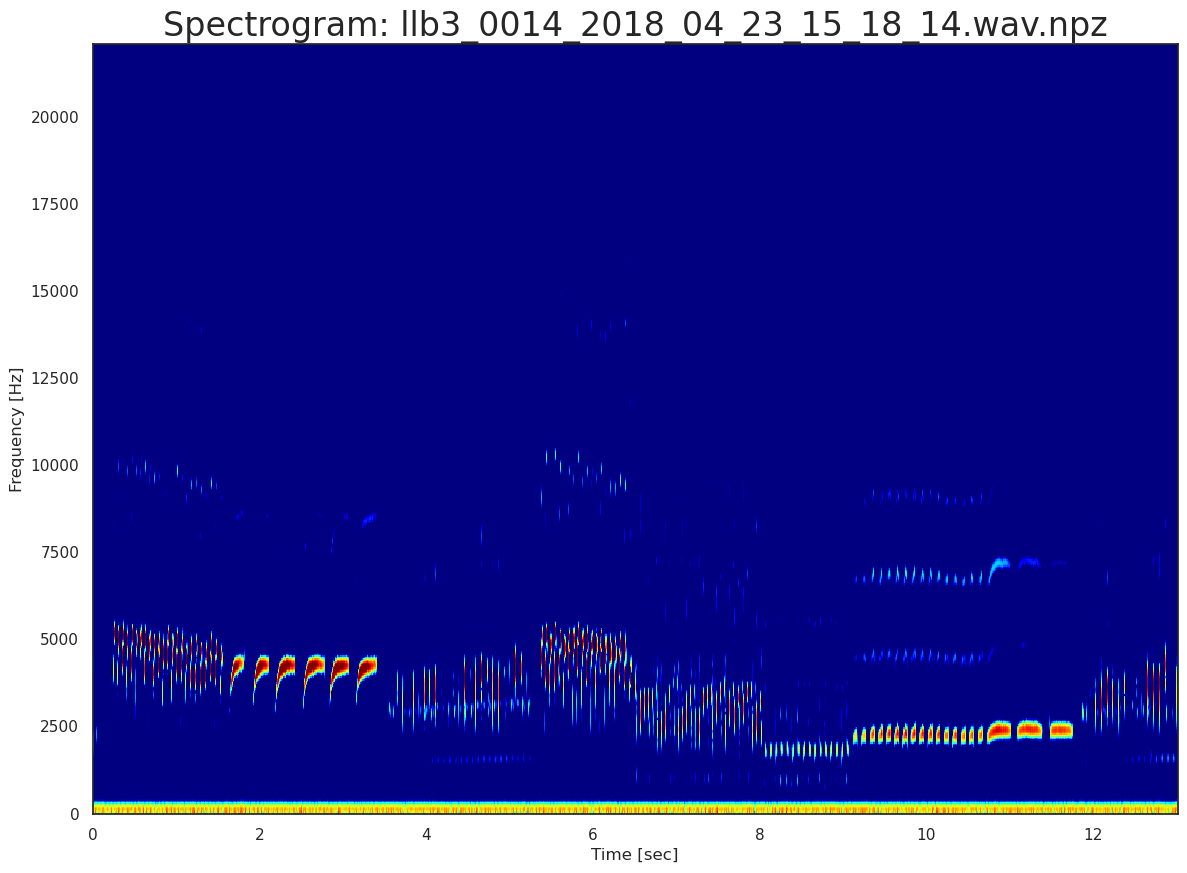

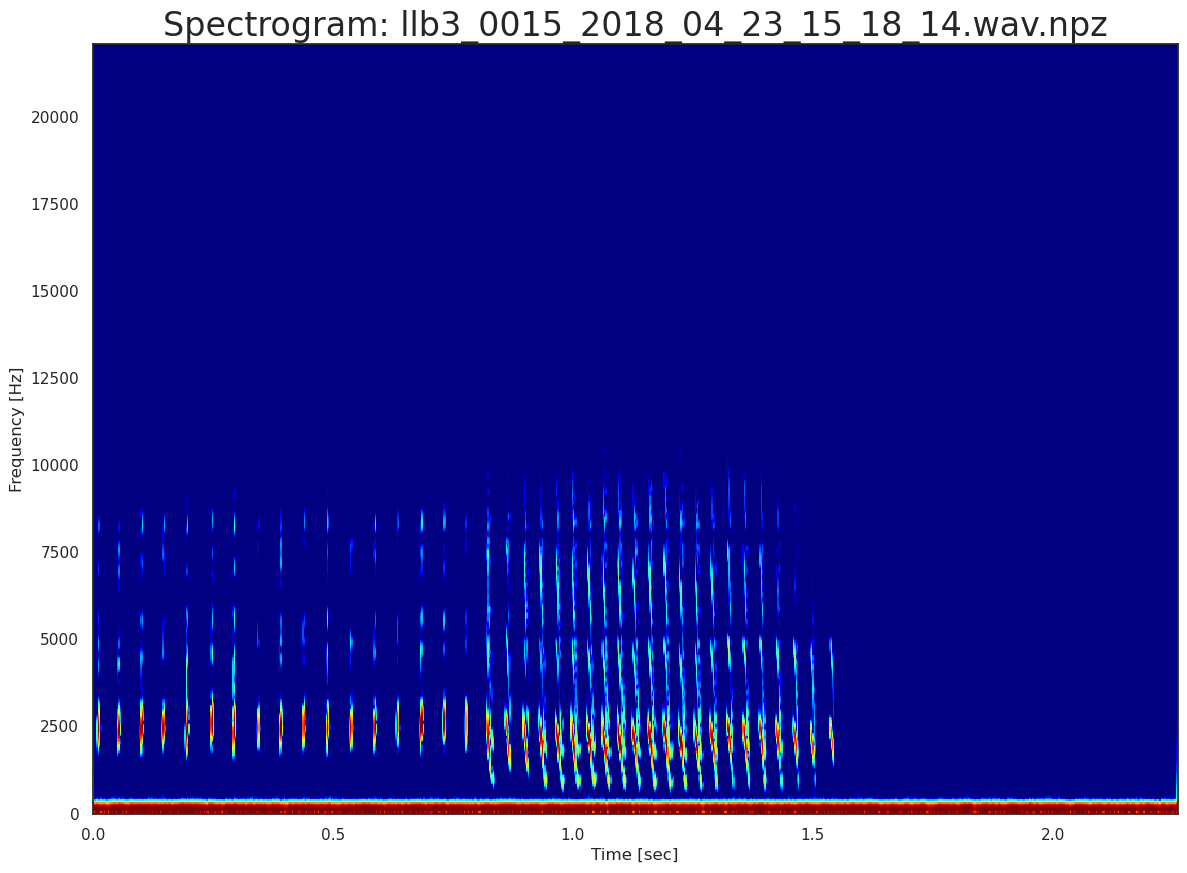

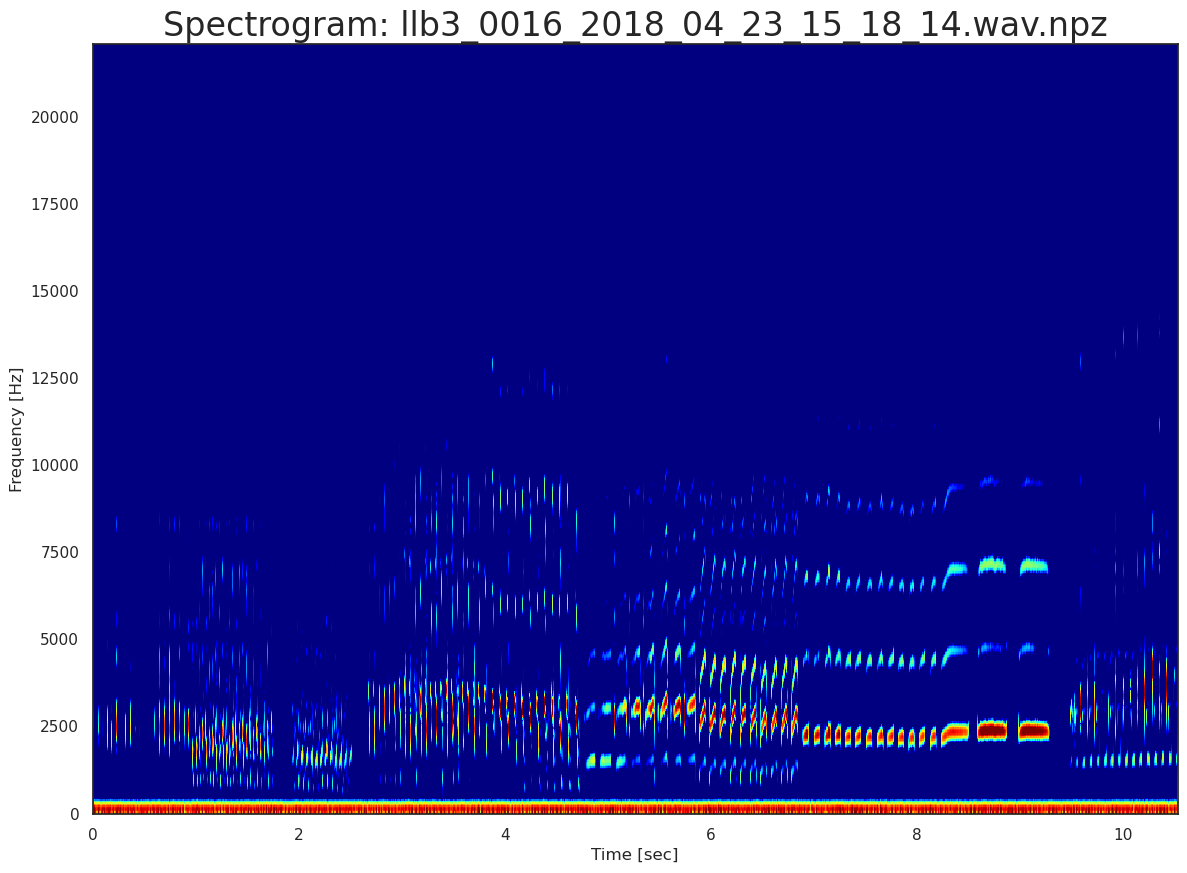

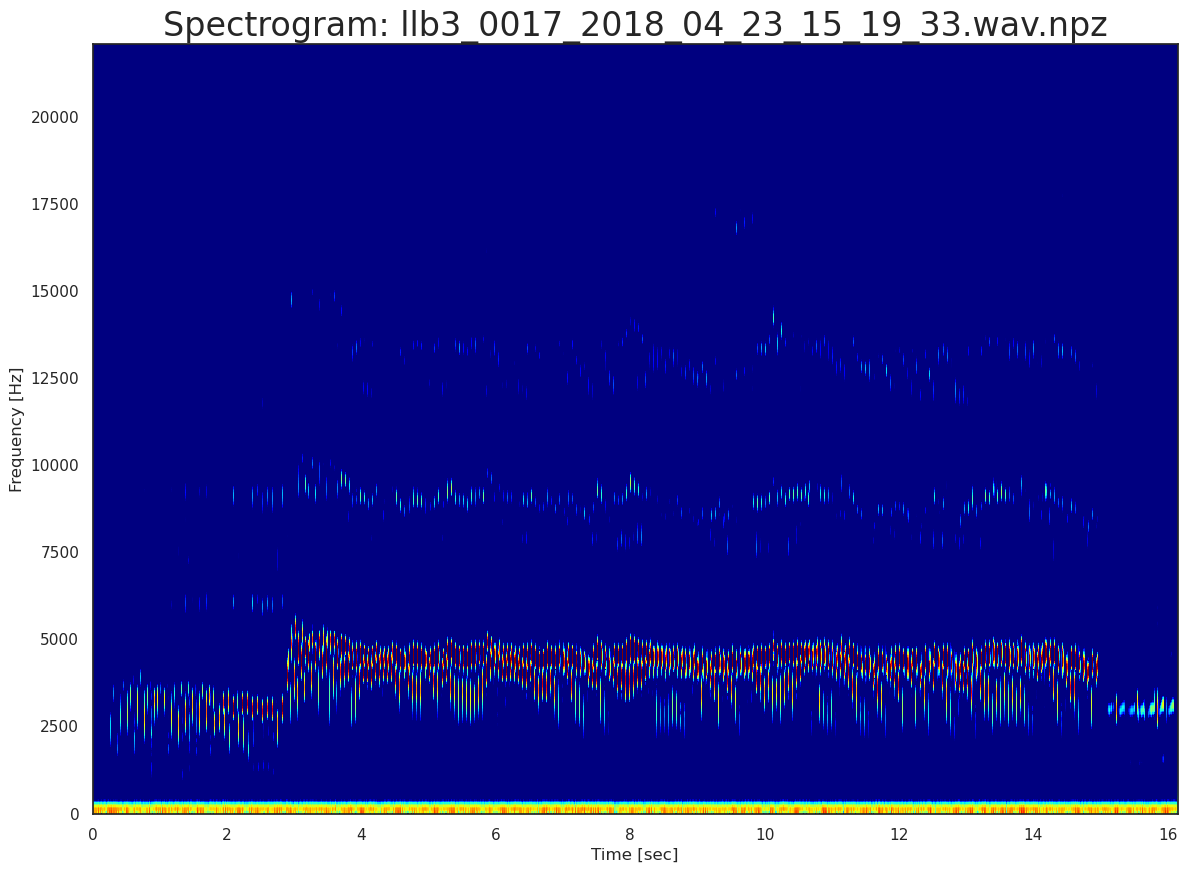

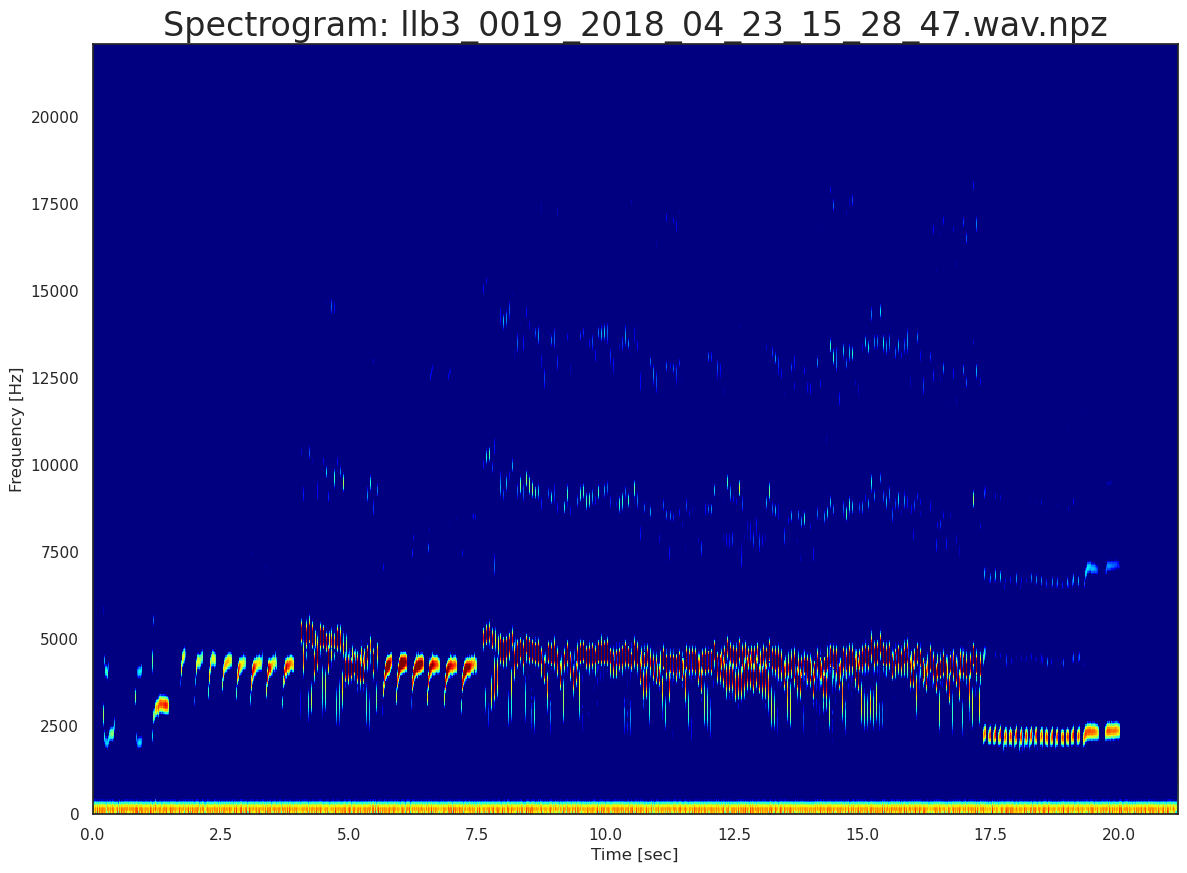

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 18 10:59:02 2023

@author: ananyakapoor
"""

# After meeting with Tim, I will work on the following steps:
    # 1. Look at spectrograms but capping it at 5000 Hz . Also would want to filter out the lower basal frequencies
    # 2. Stack a reasonable number of spectrograms together 
    # 3. Identify a window size based on the syllable length 
    # 4. Do a UMAP embedding of the spectrogram. Visualize the embedding
    # 5. If you can, create an animation of the transitions
    

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score
import umap
from sklearn.decomposition import PCA
import warnings
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
warnings.filterwarnings("ignore")

# ===============================================================================================================================
# # Let's play around with filtering out Hz > 5000 and Hz<500. Stacking two Spectrograms, entire spectrogram being used for UMAP
# ===============================================================================================================================

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


# os.chdir('/Users/ananyakapoor/Dropbox (University of Oregon)/Kapoor_Ananya/01_Projects/01_a_Rotations/Gardner_Lab/Canary_Data/llb3/llb3_data_matrices/Python_Files')

# # DATASET 1

# dat1 = np.load('llb3_0185_2018_04_24_08_34_45.wav.npz')
# # array_names = dat.keys()

# spec1 = dat1['s']
# times1 = dat1['t']
# frequencies1 = dat1['f']
# labels1 = dat1['labels']
# labels1 = labels1.T
# # df = pd.DataFrame(labels.T)
# # df.columns = ['labels']

# # Plot the spectrogram as a heatmap
# plt.figure()
# plt.title("Spectrogram",  fontsize=24)
# plt.pcolormesh(times1, frequencies1, spec1, cmap='jet')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()


# # Let's get rid of higher order frequencies
# mask1 = (frequencies1<5000)&(frequencies1>500)
# masked_frequencies1 = frequencies1[mask1]

# subsetted_spec1 = spec1[mask1.reshape(mask1.shape[0],),:]

# plt.figure()
# plt.title("Spectrogram",  fontsize=24)
# plt.pcolormesh(times1, masked_frequencies1, subsetted_spec1, cmap='jet')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

# # DATASET 2

# dat2 = np.load('llb3_0186_2018_04_24_08_40_01.wav.npz')
# # array_names = dat.keys()

# spec2 = dat2['s']
# times2 = dat2['t']
# frequencies2 = dat2['f']
# labels2 = dat2['labels']
# labels2 = labels2.T
# # df = pd.DataFrame(labels.T)
# # df.columns = ['labels']

# # Plot the spectrogram as a heatmap
# plt.figure()
# plt.title("Spectrogram",  fontsize=24)
# plt.pcolormesh(times2, frequencies2, spec2, cmap='jet')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()


# # Let's get rid of higher order frequencies
# mask2 = (frequencies2<5000)&(frequencies2>500)
# masked_frequencies2 = frequencies2[mask2]

# subsetted_spec2 = spec2[mask2.reshape(mask2.shape[0],),:]

# plt.figure()
# plt.title("Spectrogram",  fontsize=24)
# plt.pcolormesh(times2, masked_frequencies2, subsetted_spec2, cmap='jet')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

# stacked_spectrograms = np.concatenate((subsetted_spec1, subsetted_spec2), axis = 1)

# stacked_labels = np.concatenate((labels1, labels2), axis = 0)

# # Get a list of unique categories
# unique_categories = np.unique(stacked_labels)

# # Create a dictionary that maps categories to random colors
# category_colors = {category: np.random.rand(3,) for category in unique_categories}


# spec_for_analysis = stacked_spectrograms.T

# reducer = umap.UMAP()
# embedding = reducer.fit_transform(spec_for_analysis)
# embedding.shape

# plt.figure()
# for category in unique_categories:
#     mask = stacked_labels == category
#     mask.shape = (mask.shape[0],)
#     plt.scatter(embedding[mask,0], embedding[mask,1], c=category_colors[category], label=category)
    
# plt.legend()
# plt.gca().set_aspect('equal', 'datalim')
# plt.xlabel("UMAP1")
# plt.ylabel("UMAP2")
# plt.title(f'UMAP Projection', fontsize=24);
# plt.show()

# window_labels_arr = []
# window_size = 200
# for i in range(0, 1):
# # for i in range(0, spec_for_analysis.shape[0]-window_size+1):
#     window = spec_for_analysis[i:i+window_size,:]
#     window_labels = stacked_labels[i:i+window_size,:]
    
#     reducer = umap.UMAP()
#     embedding = reducer.fit_transform(window)
#     # embedding_arr.append(embedding)
#     window_labels_arr.append(window_labels)


# unique_categories = np.unique(window_labels)

# plt.figure()
# for category in unique_categories:
#     mask = window_labels == category
#     mask.shape = (mask.shape[0],)
#     plt.scatter(embedding[mask,0], embedding[mask,1], c=category_colors[category], label=category)
    
# plt.legend()
# plt.gca().set_aspect('equal', 'datalim')
# plt.xlabel("UMAP1")
# plt.ylabel("UMAP2")
# plt.title(f'UMAP Projection', fontsize=24);
# plt.show()

# =============================================================================
# # Let's take a step towards automation
# =============================================================================

directory = '/home/akapoor/Dropbox (University of Oregon)/Kapoor_Ananya/01_Projects/01_a_Rotations/Gardner_Lab/Canary_Data/llb3/llb3_data_matrices/Python_Files'
files = os.listdir(directory)
all_songs_data = [element for element in files if '.npz' in element]
all_songs_data.sort()
os.chdir(directory)
num_spec = 10


stacked_labels = [] 
stacked_specs = []

for i in np.arange(num_spec):
    dat = np.load(all_songs_data[i])
    spec = dat['s']
    times = dat['t']
    frequencies = dat['f']
    labels = dat['labels']
    labels = labels.T

    # Plot the spectrogram as a heatmap
    plt.figure()
    plt.title(f'Spectrogram: {all_songs_data[i]}',  fontsize=24)
    plt.pcolormesh(times, frequencies, spec, cmap='jet')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()


    # Let's get rid of higher order frequencies
    mask = (frequencies<7500)&(frequencies>500)
    masked_frequencies = frequencies[mask]

    subsetted_spec = spec[mask.reshape(mask.shape[0],),:]
    
    stacked_labels.append(labels)
    stacked_specs.append(subsetted_spec)

stacked_specs = np.concatenate((stacked_specs), axis = 1)
stacked_labels = np.concatenate((stacked_labels), axis = 0)
    

# Get a list of unique categories
unique_categories = np.unique(stacked_labels)

# Create a dictionary that maps categories to random colors
category_colors = {category: np.random.rand(3,) for category in unique_categories}

spec_for_analysis = stacked_specs.T
window_labels_arr = []
embedding_arr = []
window_size = 590
# for i in range(0, 5):
    # print(i)
# for i in range(0, spec_for_analysis.shape[0]-window_size+1):
for i in range(0,2):
    if i%100 ==0:
        # print(f'Iteration {i} of {spec_for_analysis.shape[0]-window_size+1+1}')
        print(f'Iteration {i}')
    window = spec_for_analysis[i:i+window_size,:]
    window_labels = stacked_labels[i:i+window_size,:]
    
    # Get a list of unique categories
    unique_categories = np.unique(window_labels)

    # Create a dictionary that maps categories to random colors
    category_colors = {category: np.random.rand(3,) for category in unique_categories}
    
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(window)
    
    # plt.figure()
    # for category in unique_categories:
    #     mask = window_labels == category
    #     mask.shape = (mask.shape[0],)
    #     plt.scatter(embedding[mask,0], embedding[mask,1], c=category_colors[category], label=category)
        
    # plt.legend()
    # plt.gca().set_aspect('equal', 'datalim')
    # plt.xlabel("UMAP1")
    # plt.ylabel("UMAP2")
    # plt.title(f'UMAP Projection', fontsize=24);
    # plt.show()


    embedding_arr.append(embedding)
    window_labels_arr.append(window_labels)

all_embeddings = np.stack(embedding_arr)
all_window_labels = np.stack(window_labels_arr )


In [2]:
all_embeddings.shape

(2000, 590, 2)

Now let's look at the UMAP EMbedding

In [1]:
k = 0
embedding_arr = all_embeddings[k,:,:]
window = spec_for_analysis[k:k+window_size,:]
window_labels = stacked_labels[k:k+window_size,:]

# Get a list of unique categories
unique_categories = np.unique(window_labels)

# Create a dictionary that maps categories to random colors
category_colors = {category: np.random.rand(3,) for category in unique_categories}

NameError: name 'all_embeddings' is not defined

In [28]:
window.shape

(590, 163)

In [ ]:
# reducer = umap.UMAP()
# embedding = reducer.fit_transform(window)

plt.figure()
for category in unique_categories:
    mask = window_labels == category
    mask.shape = (mask.shape[0],)
    plt.scatter(embedding_arr[mask,0], embedding_arr[mask,1], c=category_colors[category], label=category)
    
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title(f'UMAP Projection for Window Number: {k}', fontsize=24);
plt.show()

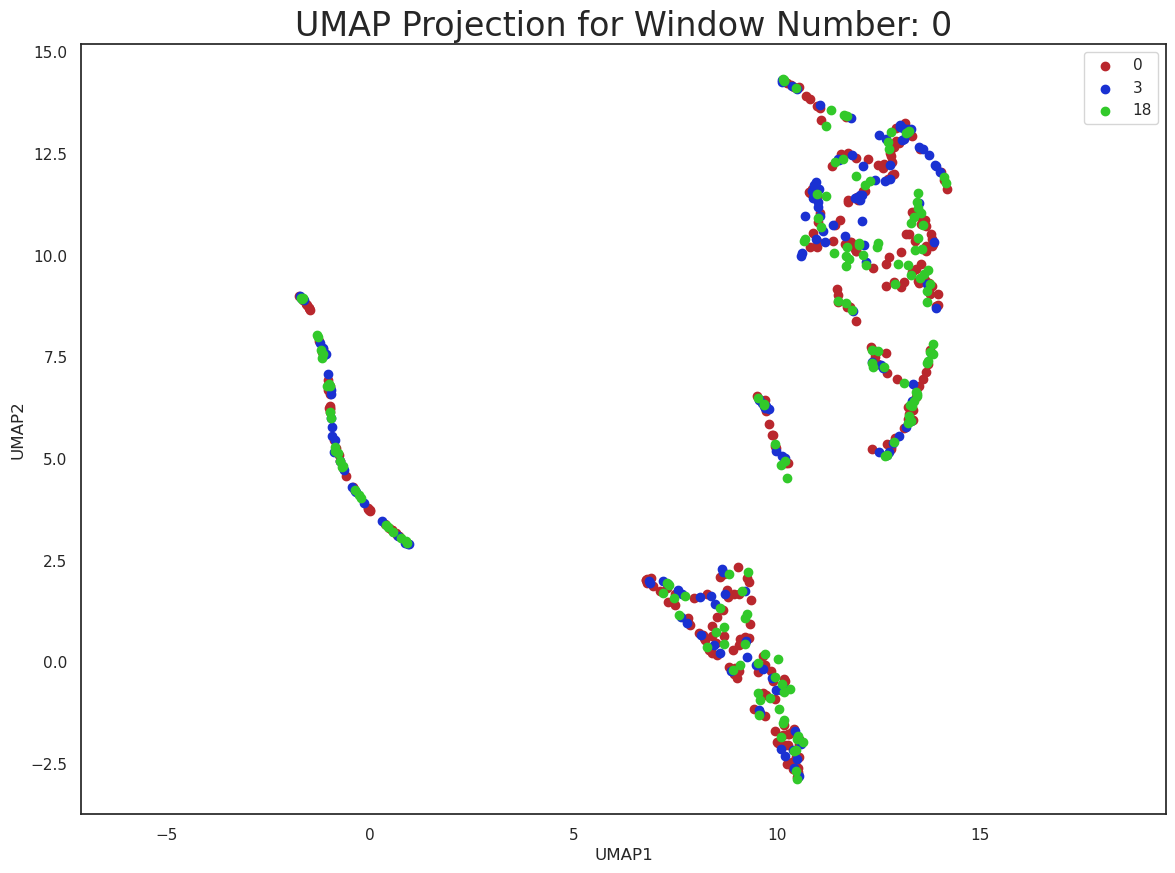

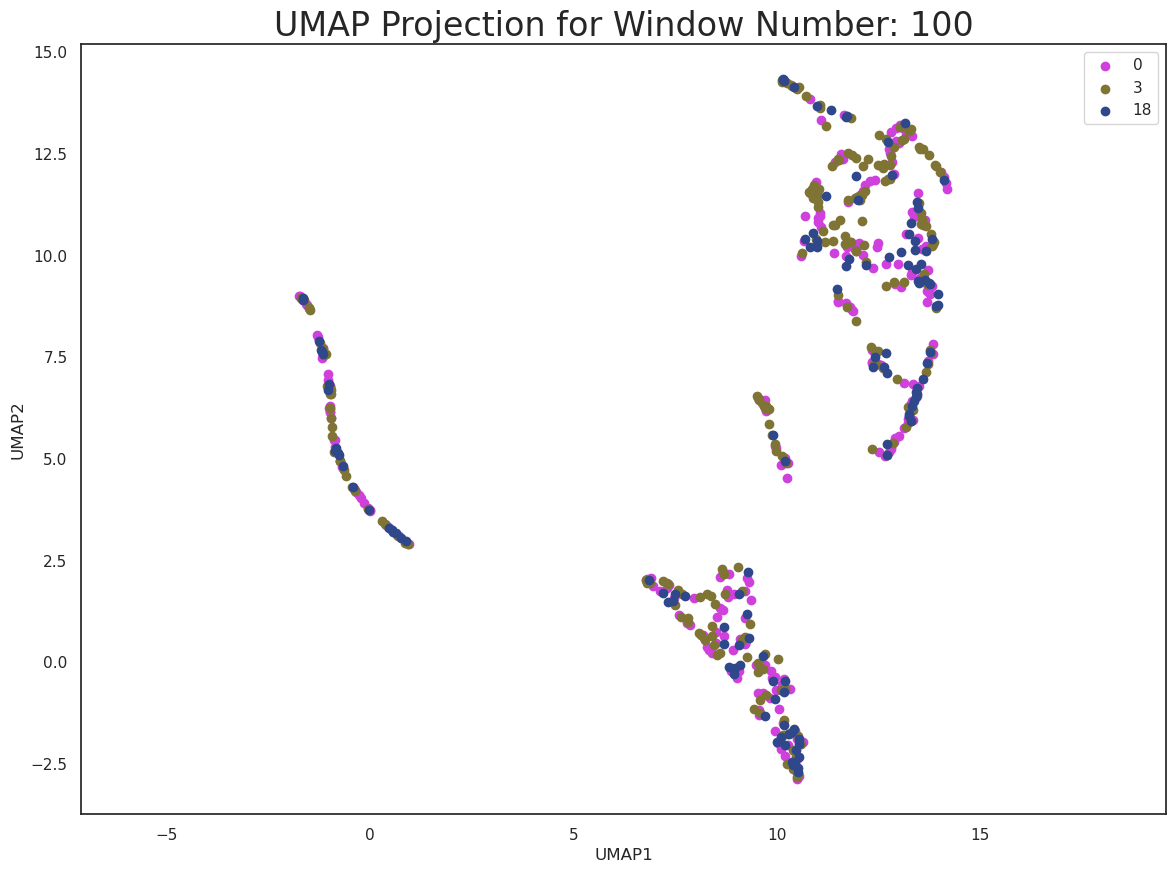

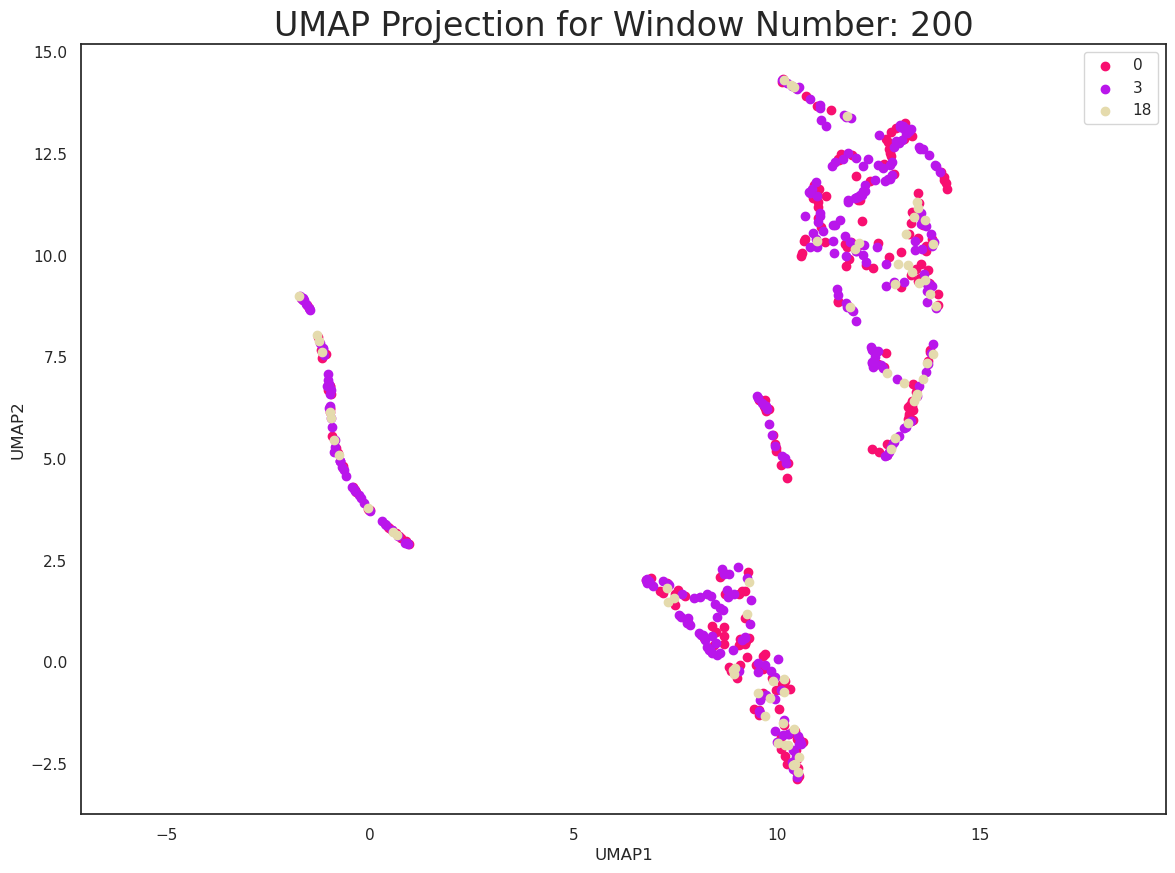

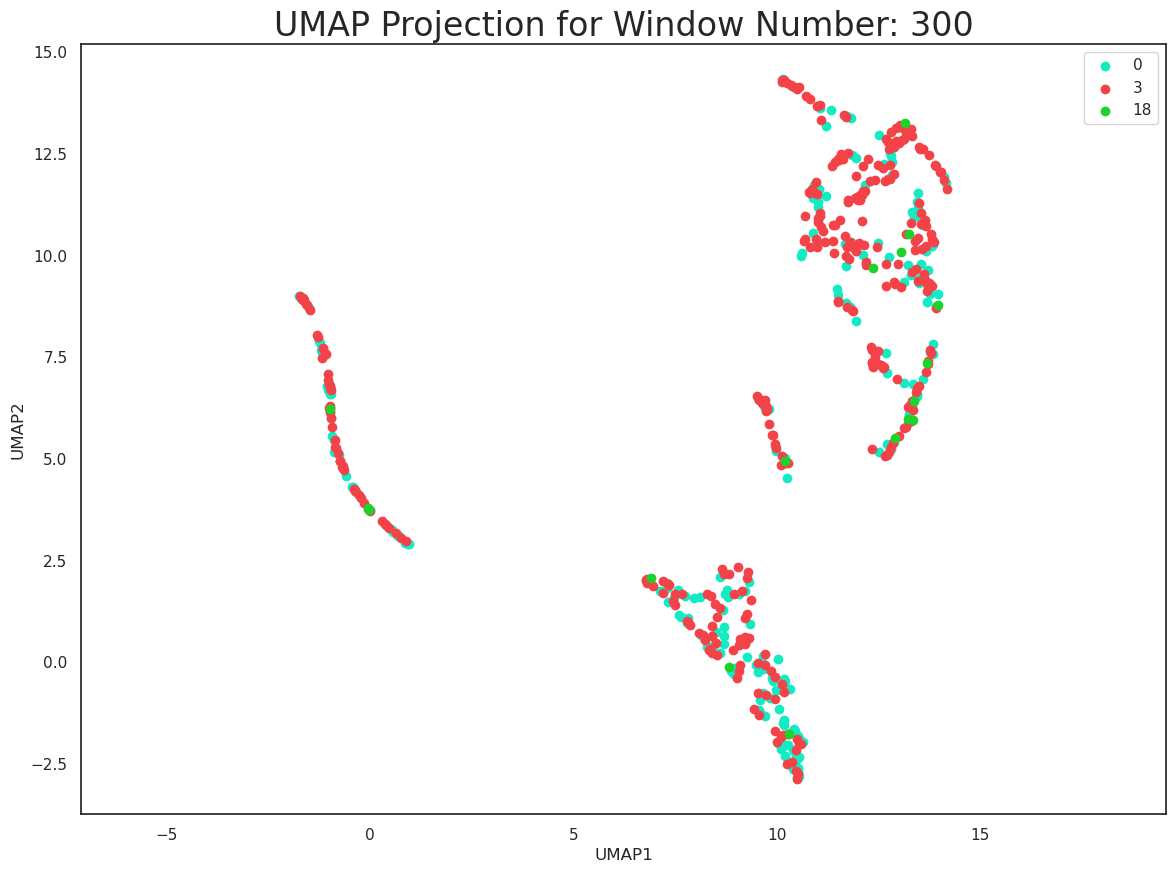

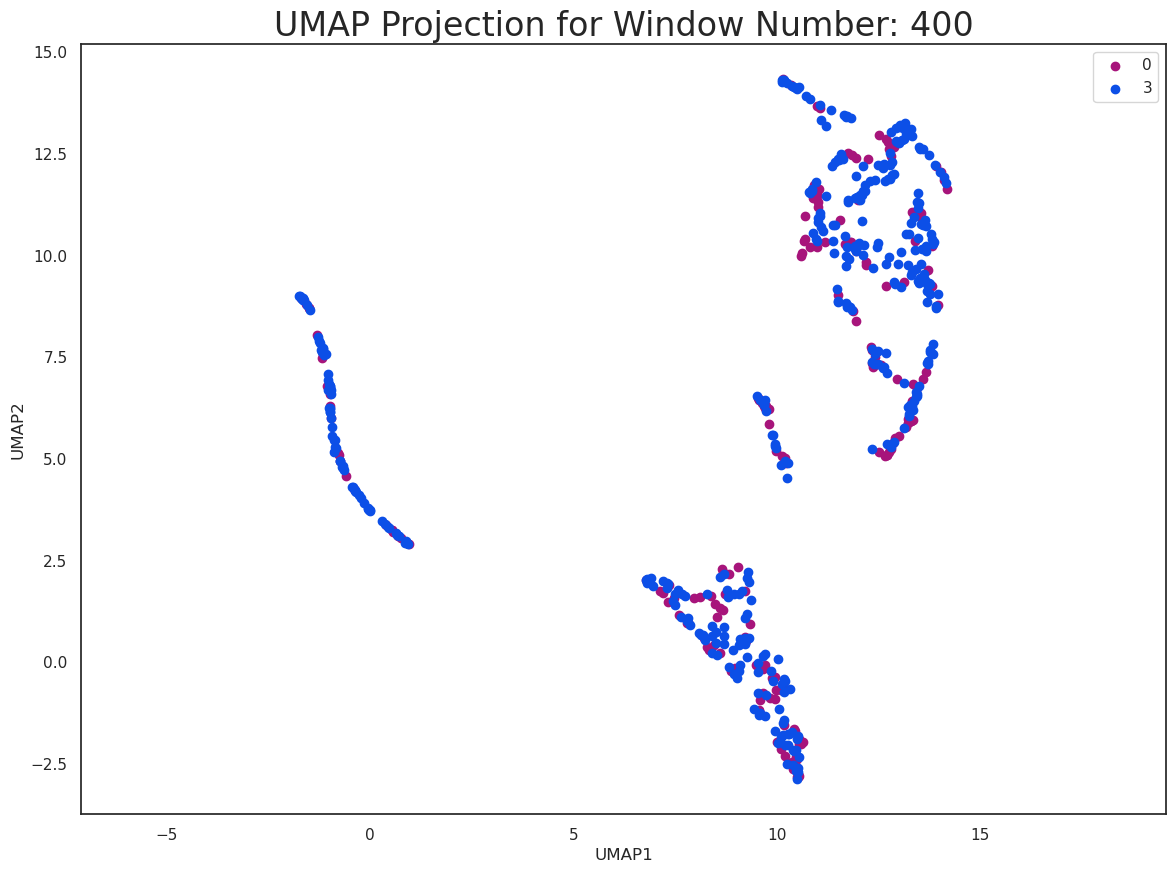

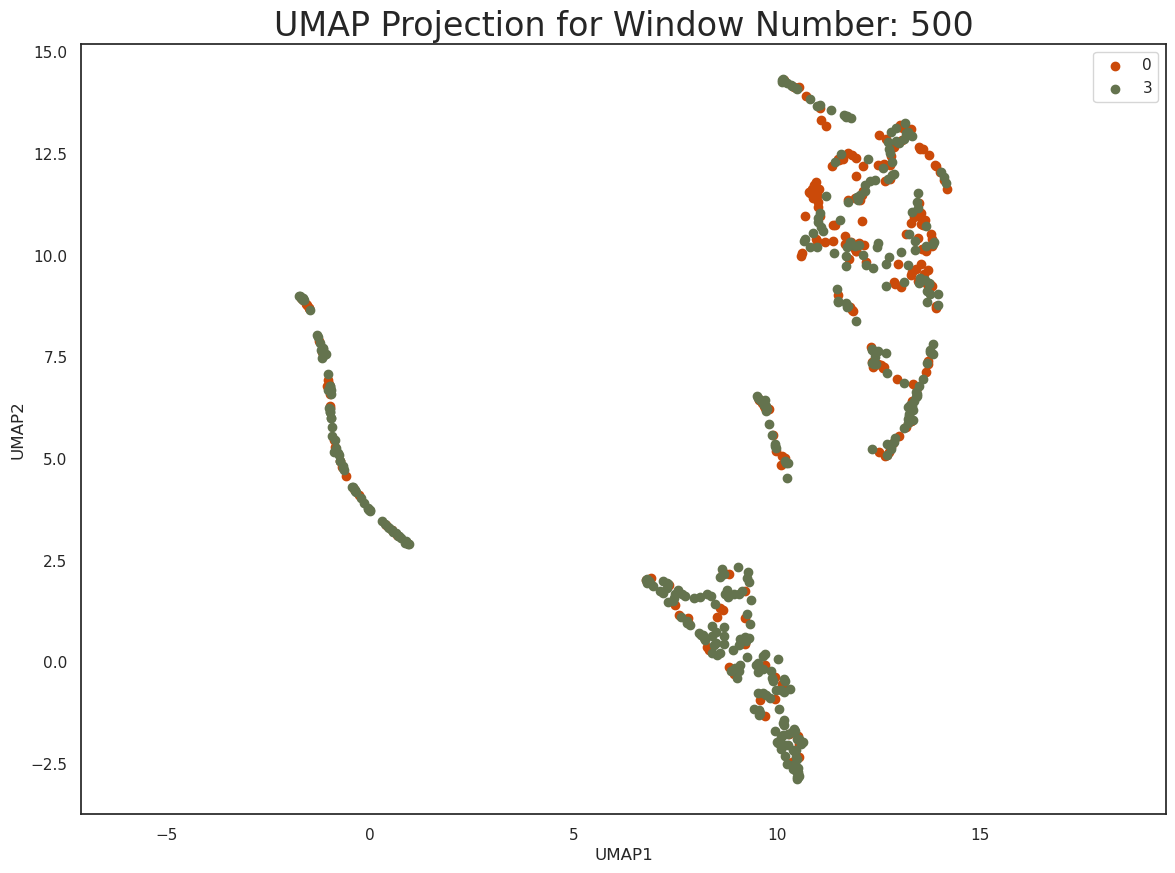

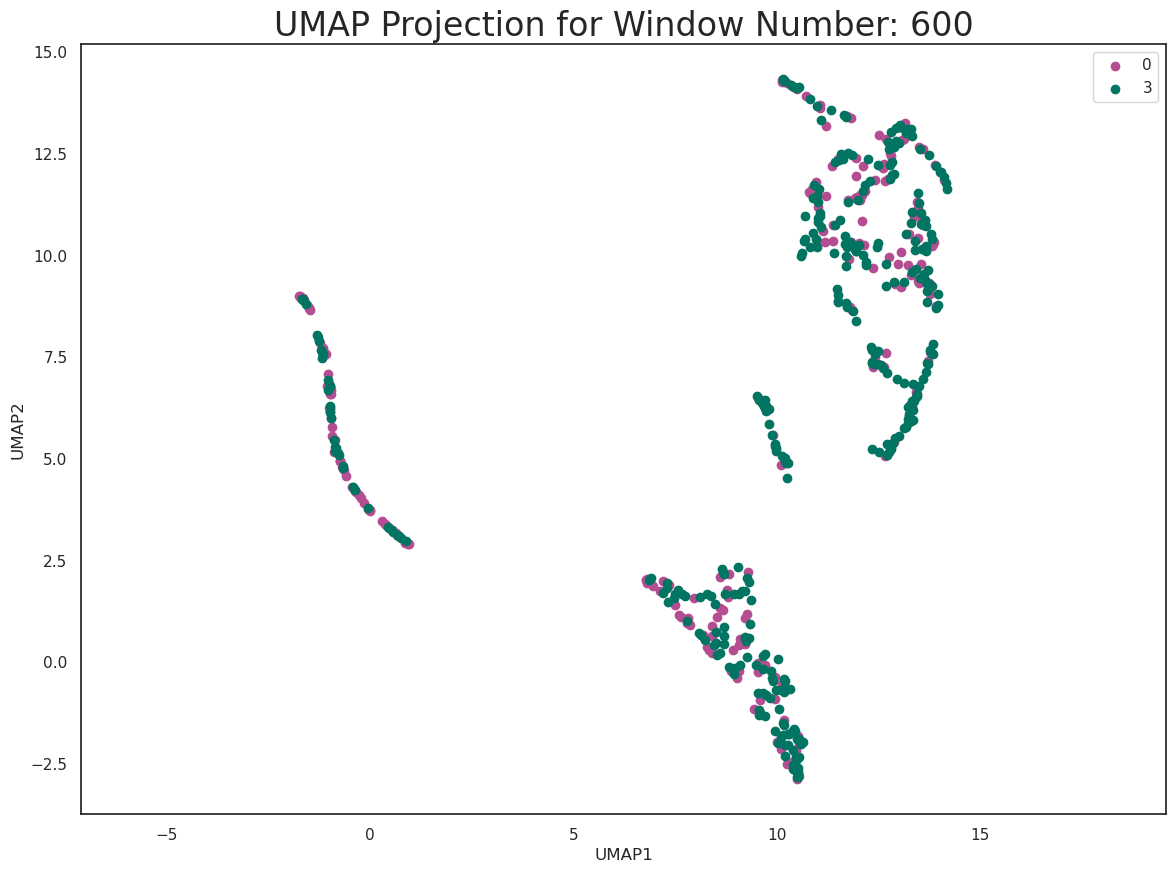

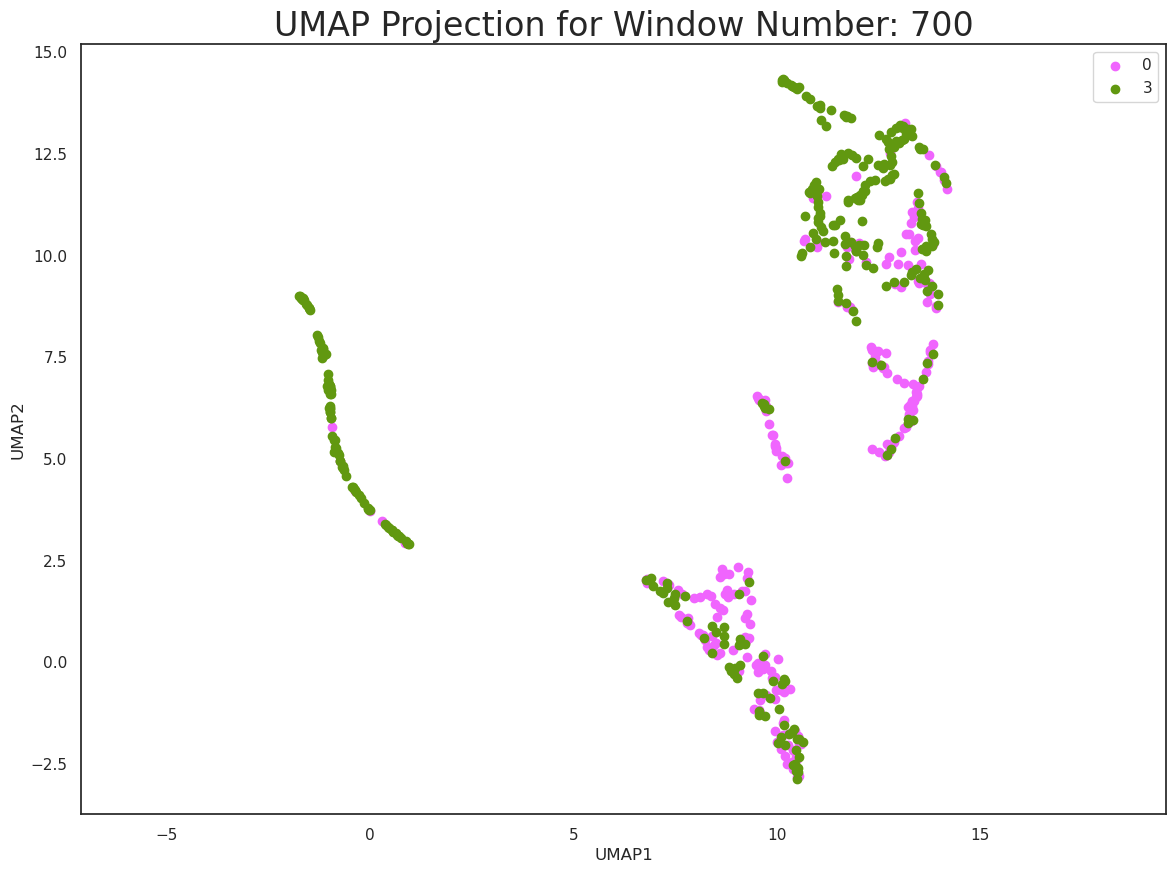

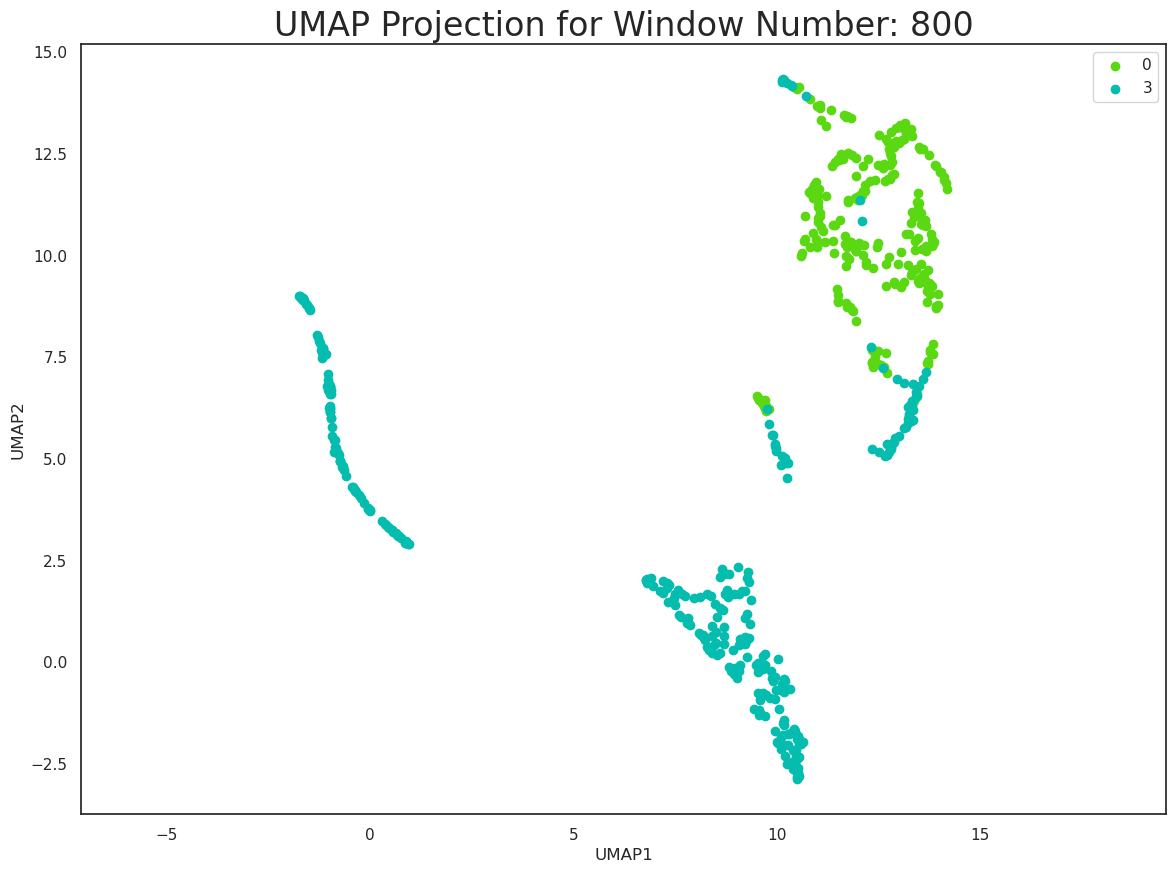

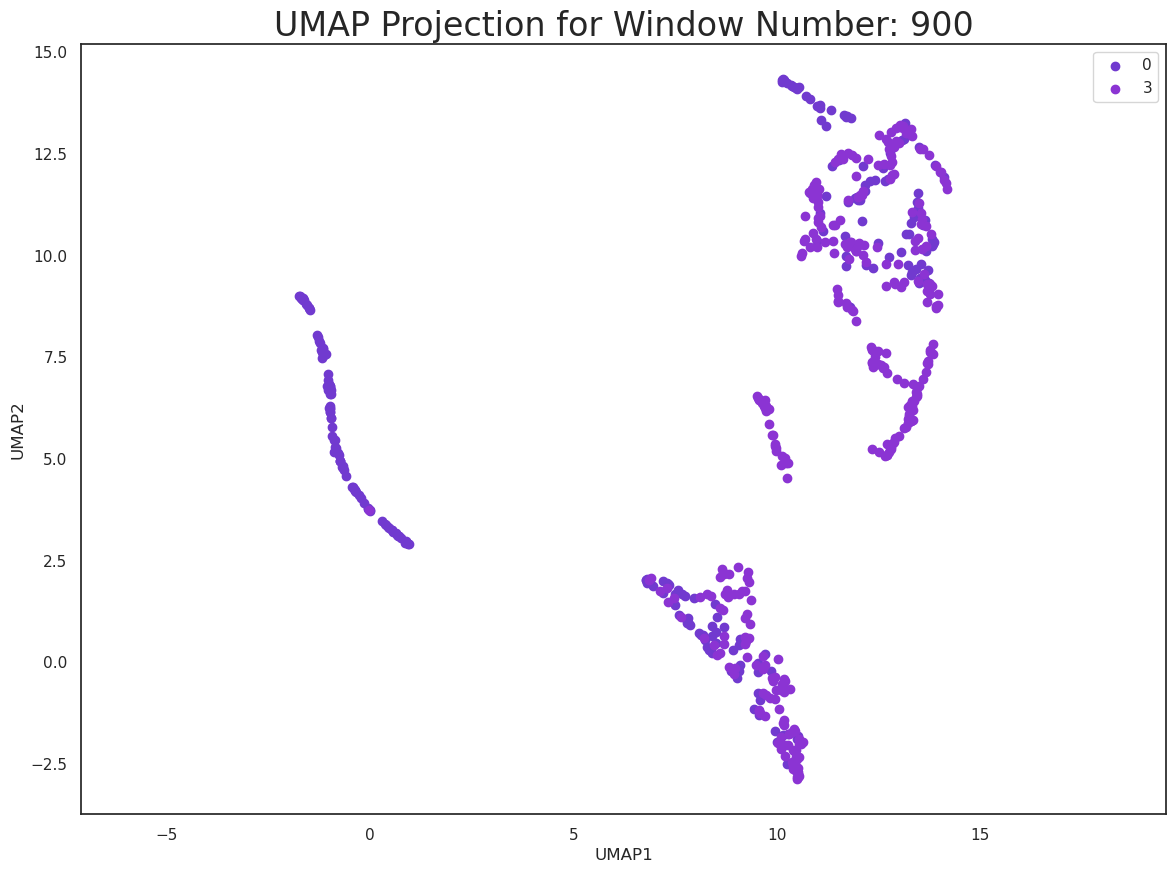

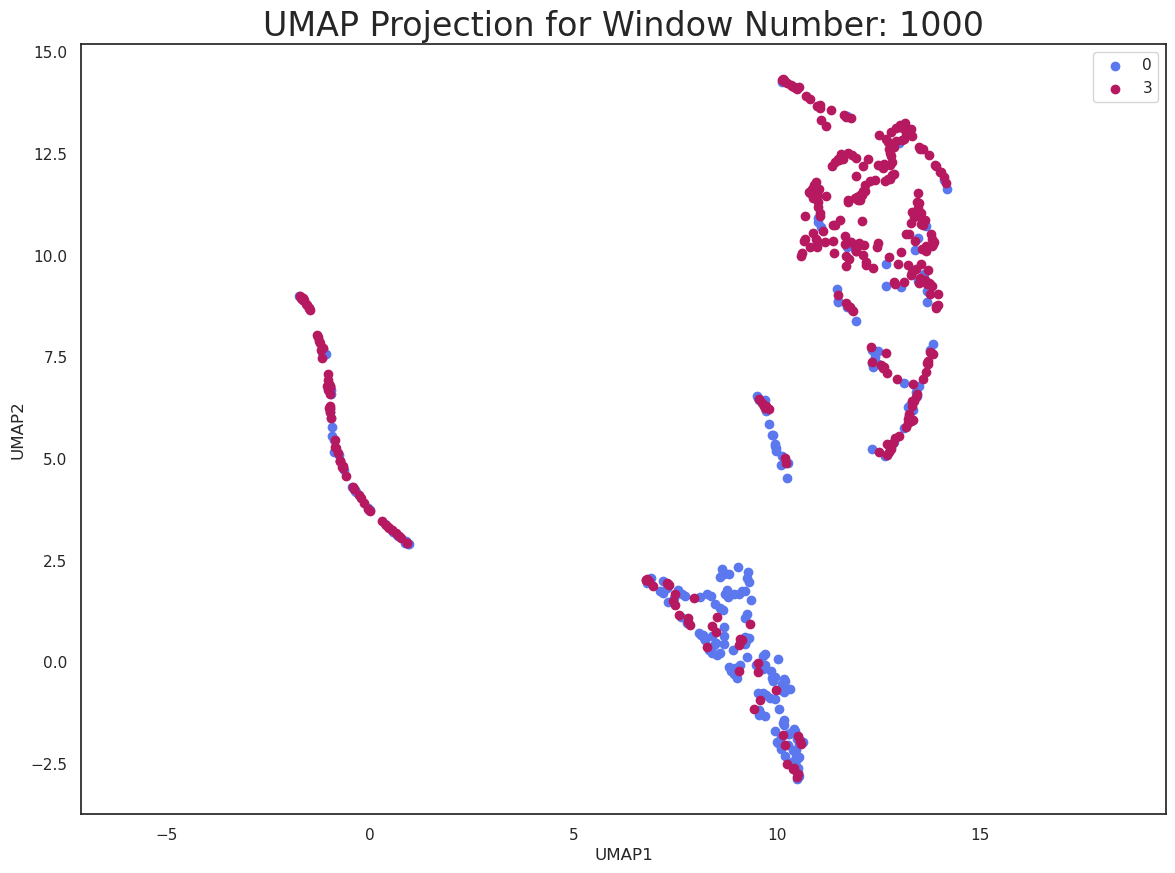

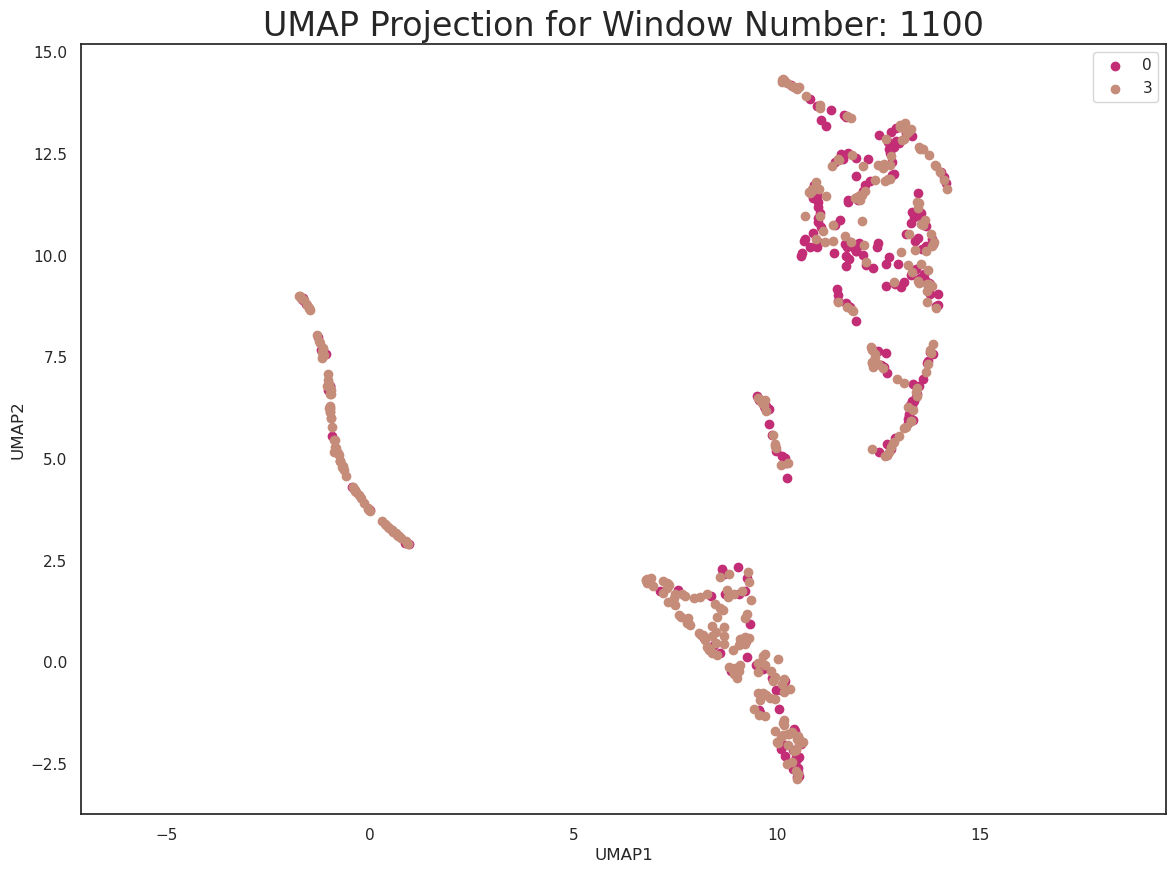

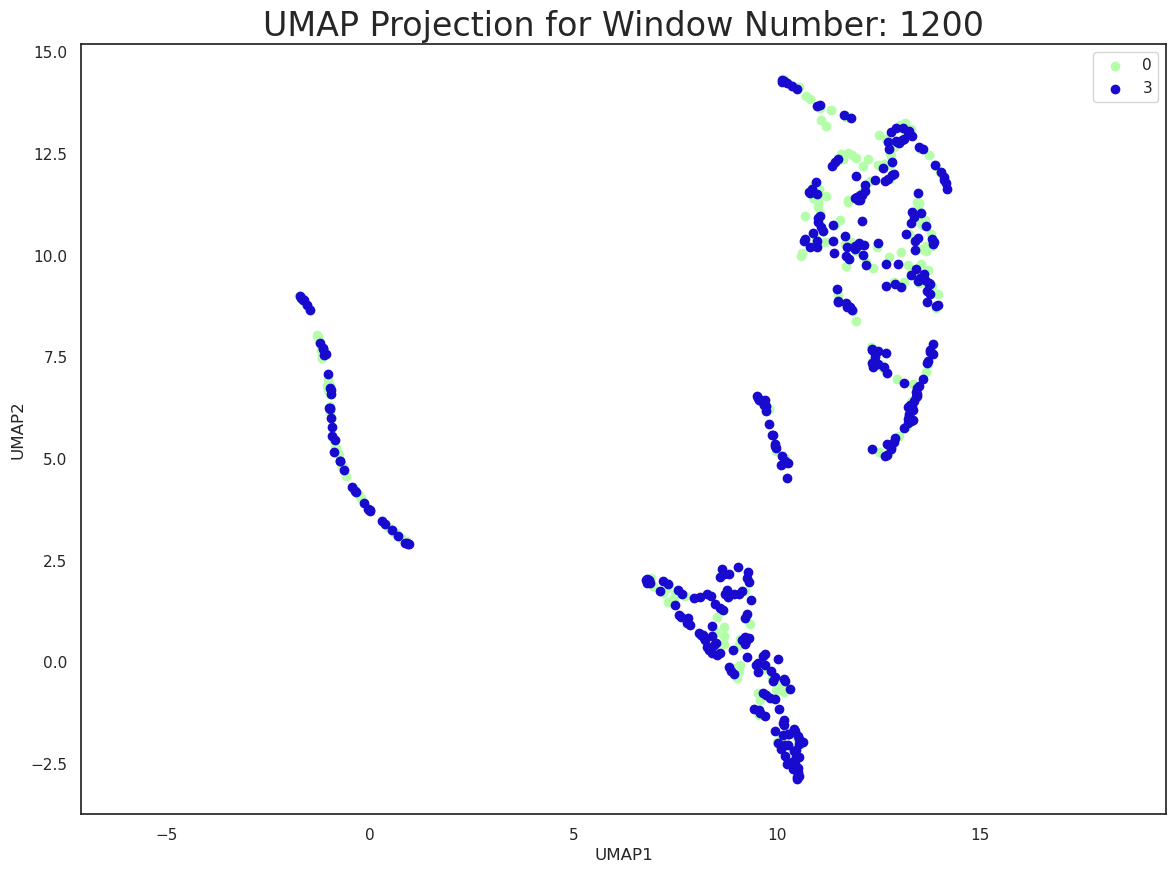

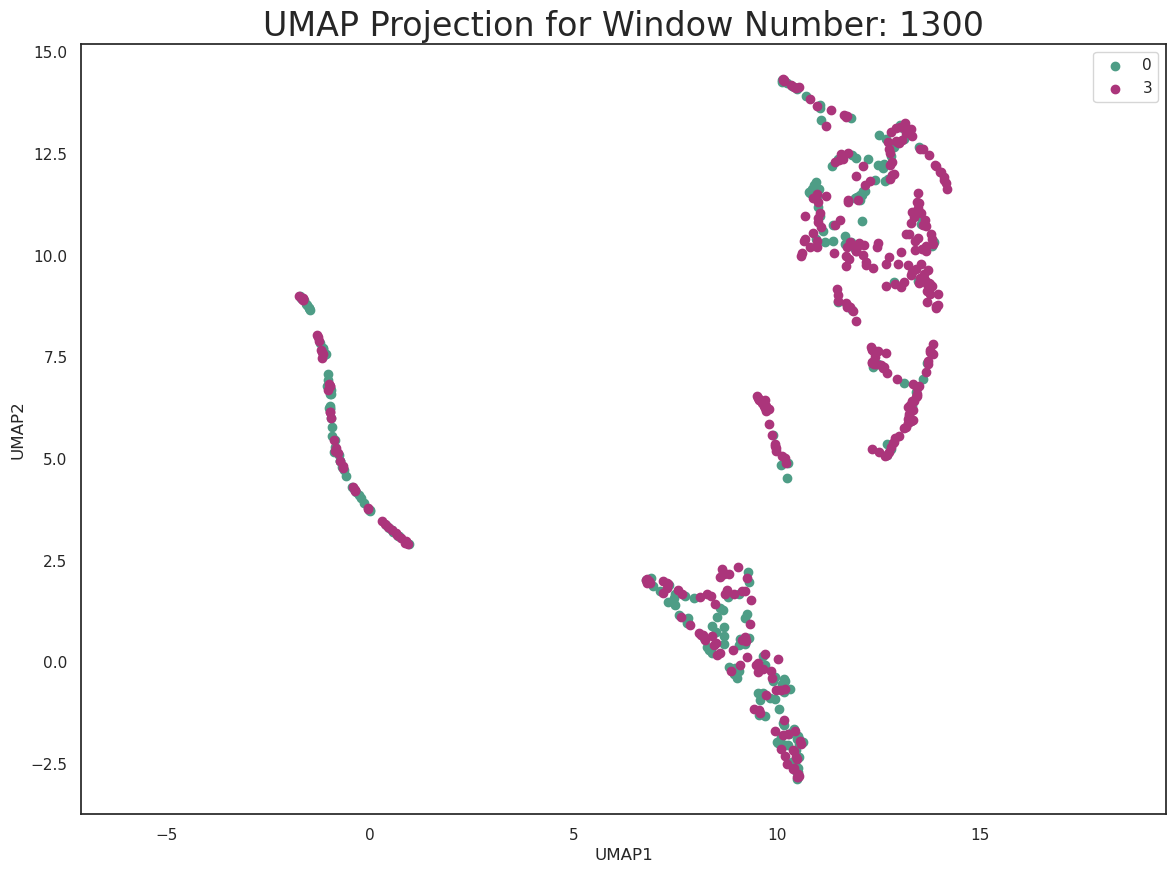

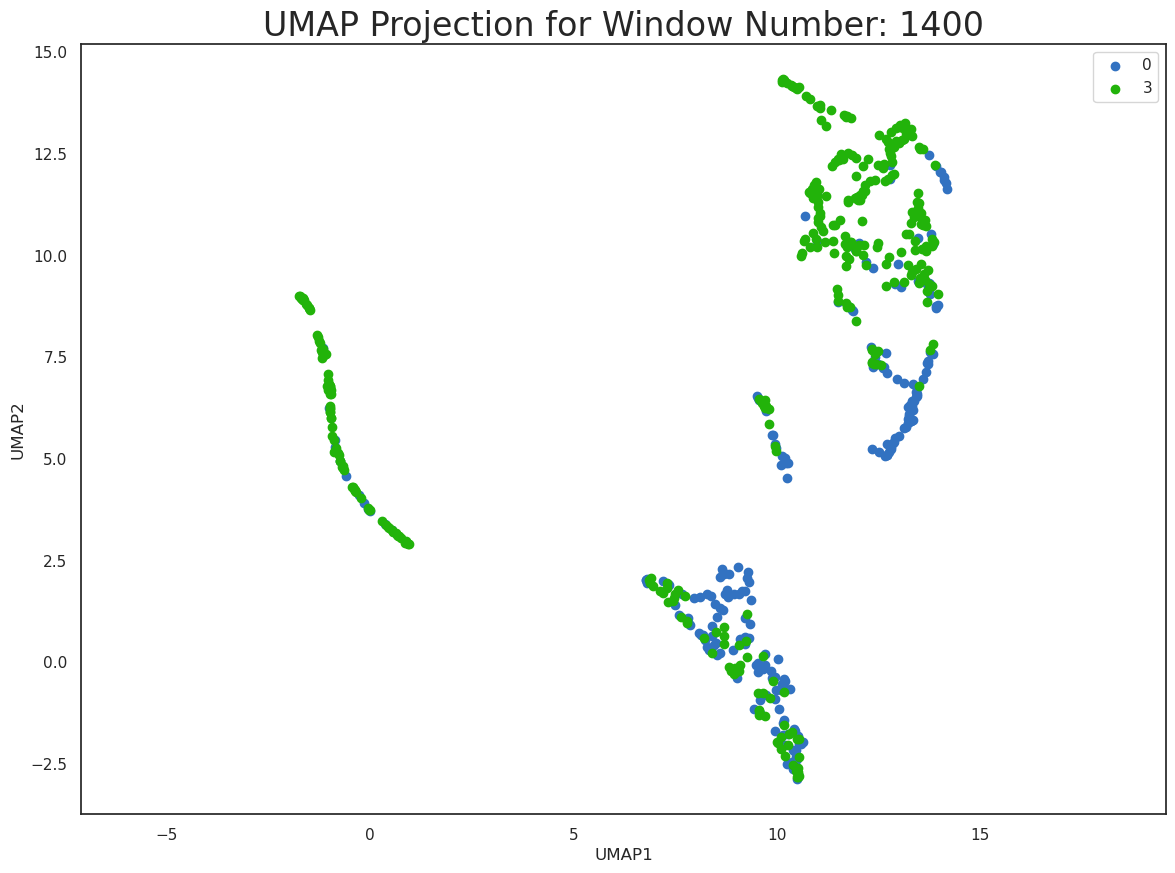

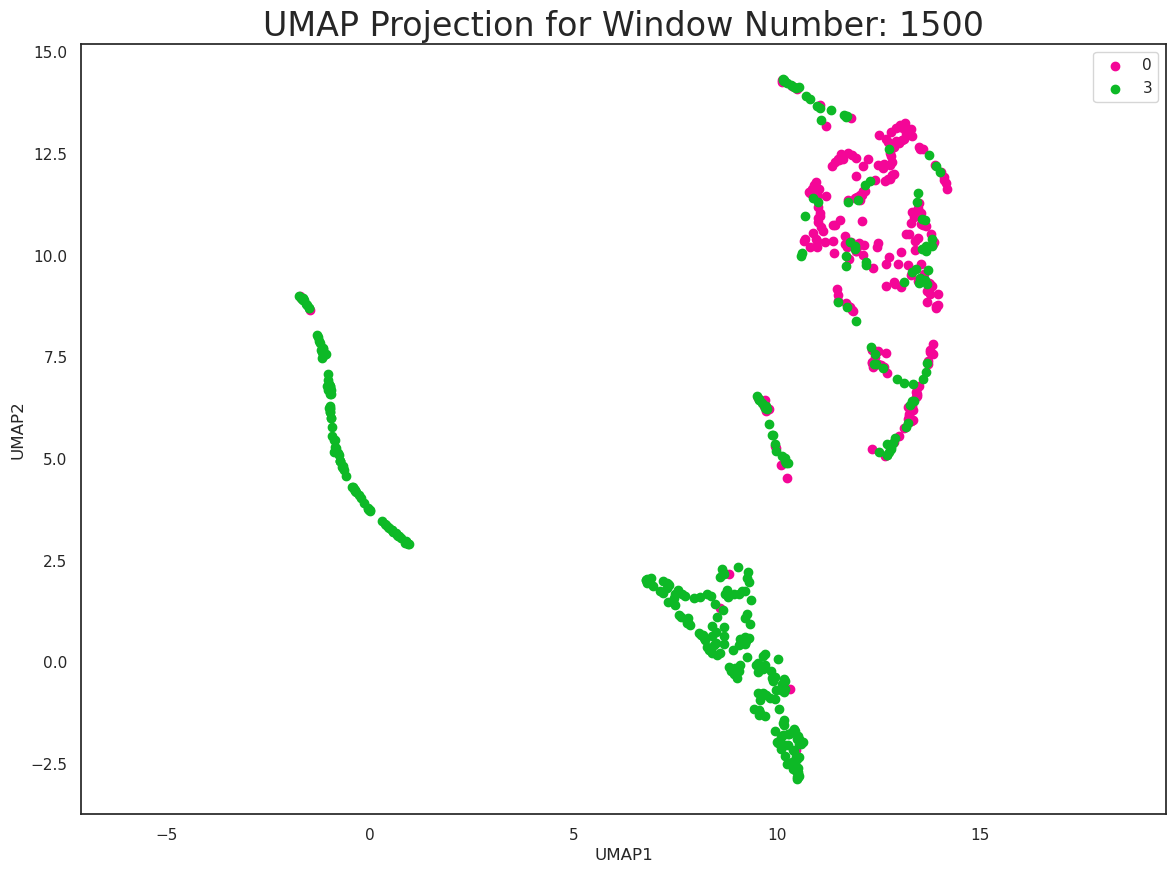

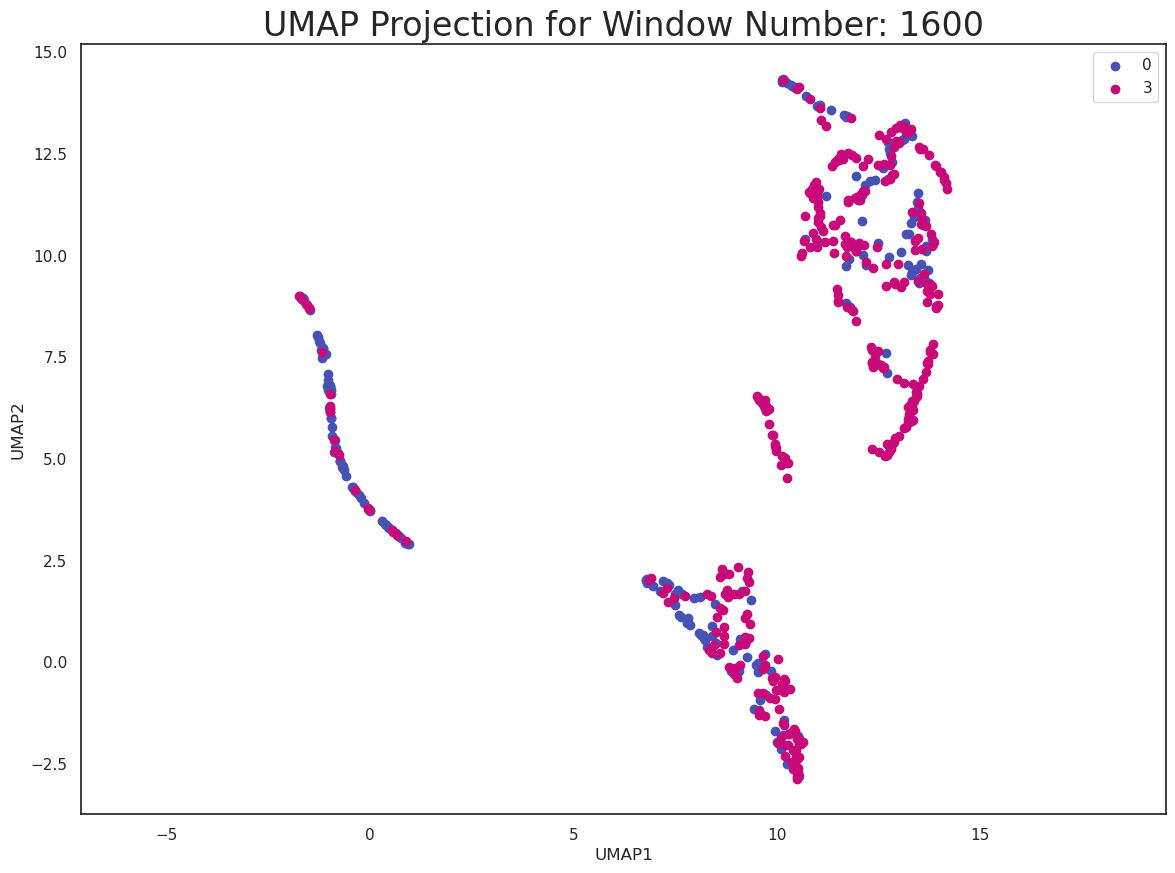

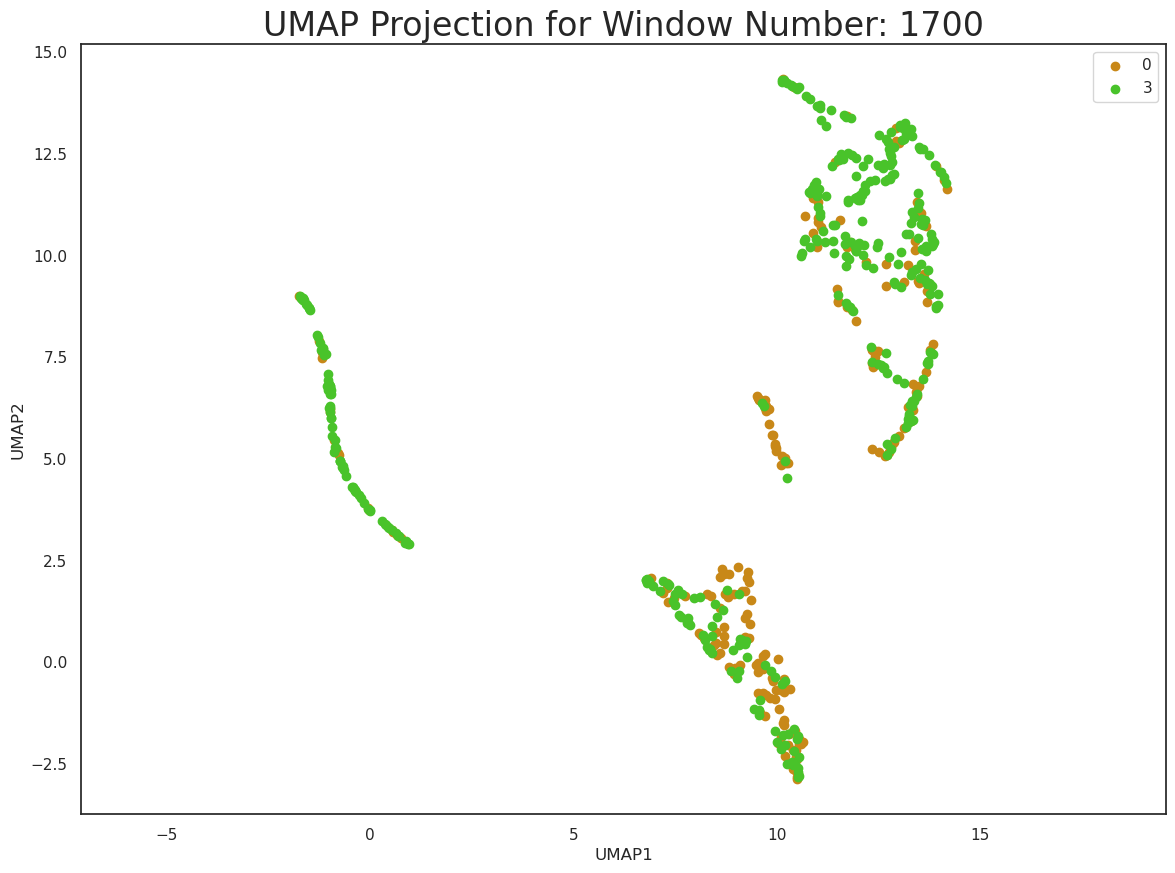

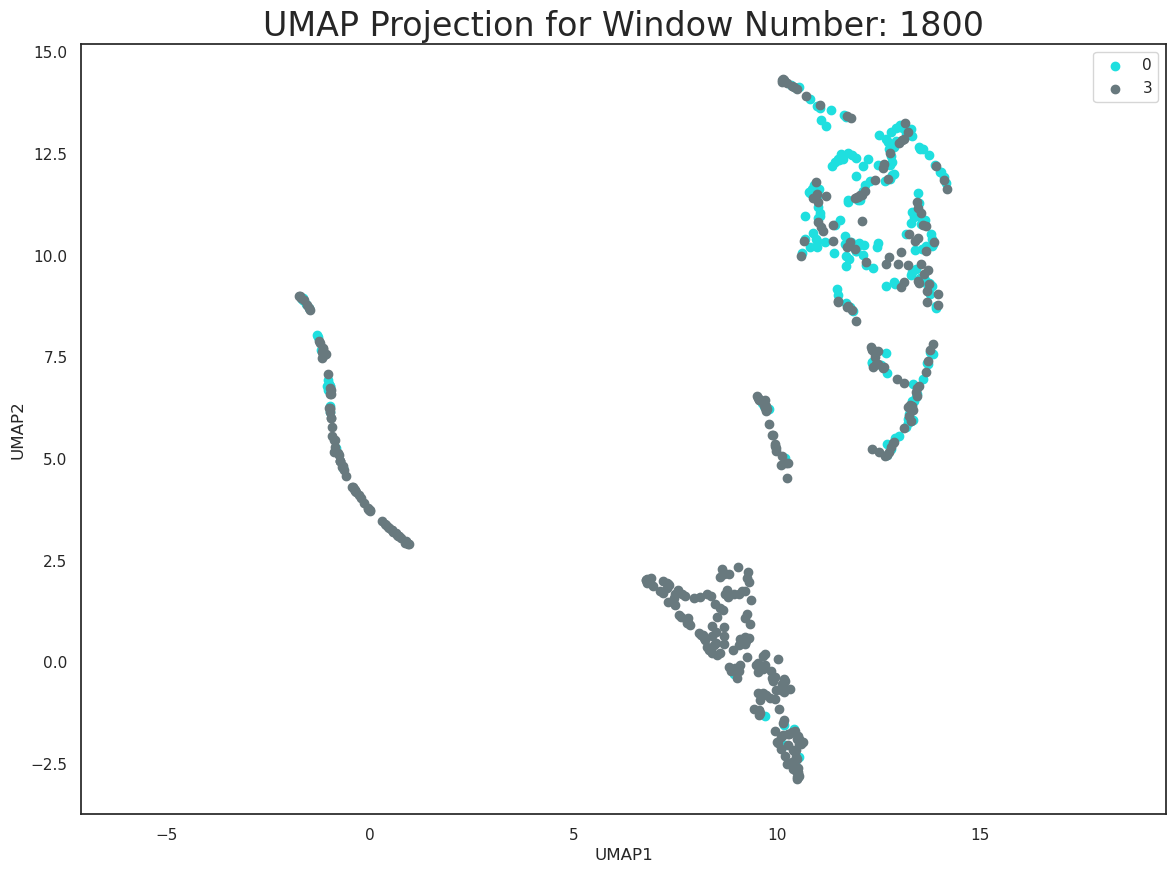

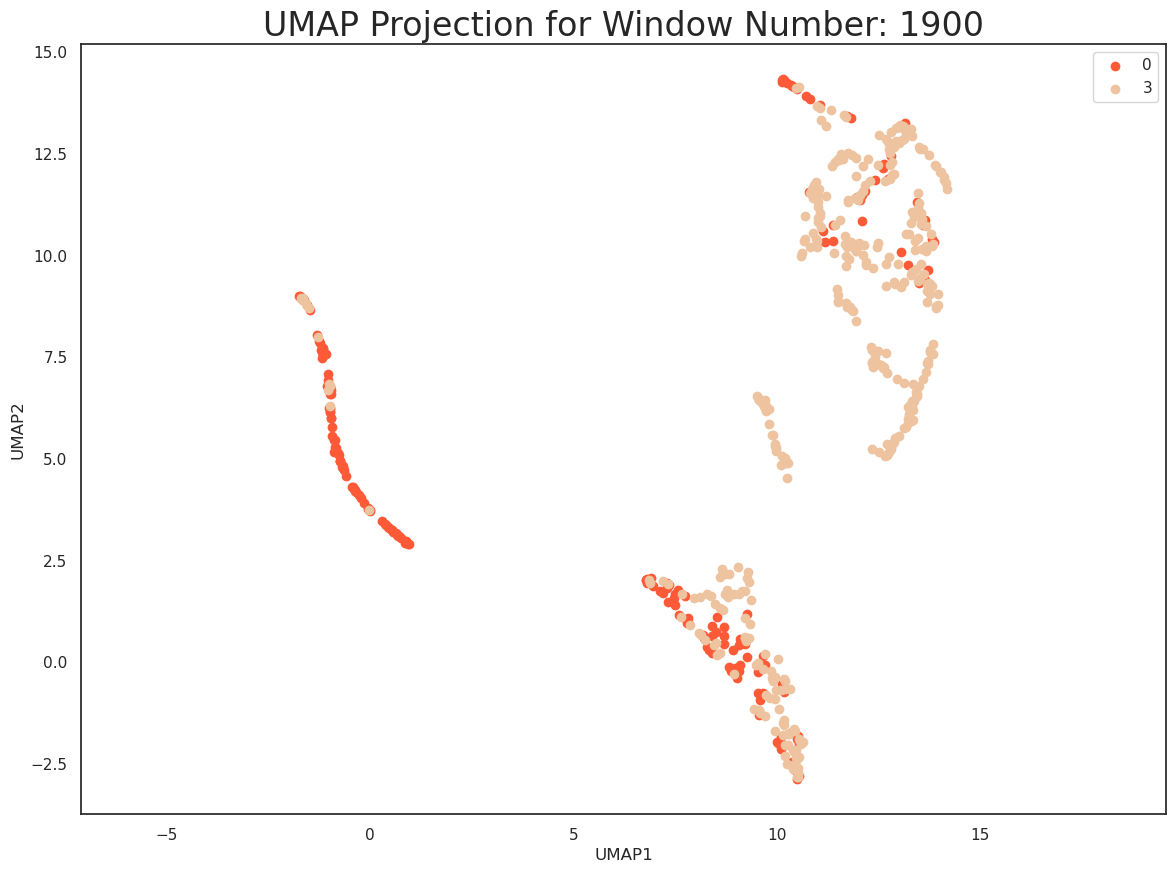

In [26]:
for k in np.arange(0,2000,100):

    window = spec_for_analysis[k:k+window_size,:]
    window_labels = stacked_labels[k:k+window_size,:]

    # Get a list of unique categories
    unique_categories = np.unique(window_labels)

    # Create a dictionary that maps categories to random colors
    category_colors = {category: np.random.rand(3,) for category in unique_categories}

    # reducer = umap.UMAP()
    # embedding = reducer.fit_transform(window)

    plt.figure()
    for category in unique_categories:
        mask = window_labels == category
        mask.shape = (mask.shape[0],)
        plt.scatter(embedding_arr[mask,0], embedding_arr[mask,1], c=category_colors[category], label=category)
        
    plt.legend()
    plt.gca().set_aspect('equal', 'datalim')
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.title(f'UMAP Projection for Window Number: {k}', fontsize=24);
    plt.show()